<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/WW2_Aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/LearningAI_CSV/WW2_Aircraft/world_war_2_aircrafts.csv")

In [19]:
#Inspect Data
print("Print Data Head")
print(df.head())
print("\nTotal Null Amount")
print(df.isnull().sum())
print('\nData Description')
print(df.describe())
print('\nData Info')
print(df.info())

Print Data Head
      Aircraft Type  Aircraft Subtype                 Aircraft Name  \
0  Fighter aircraft  Biplane fighters  Armstrong Whitworth Scimitar   
1  Fighter aircraft  Biplane fighters                    Avia B-534   
2  Fighter aircraft  Biplane fighters                    Avia BH-33   
3  Fighter aircraft  Biplane fighters            Blériot-SPAD S.510   
4  Fighter aircraft  Biplane fighters                   Boeing P-12   

  Year in Service Country of Origin  \
0            1936                UK   
1            1935    Czechoslovakia   
2            1927    Czechoslovakia   
3            1936            France   
4            1930                US   

     Operator(s) if different from country of origin  Manufacturer  
0                                             Norway     Armstrong  
1  Czechoslovakia, Bulgaria, Germany, Greece, Slo...          Avia  
2                                         Yugoslavia          Avia  
3                                             

In [28]:
#Feature Engineering
#1.Extracting Manfacturer Name from aircraft name
df['Manufacturer'] = df['Aircraft Name'].str.split().str[0].str.strip()
#2.Extracting in which decade was the plane manufactured.
  # Convert to numeric (will convert non-numeric to NaN)
df["Year in Service"] = pd.to_numeric(df["Year in Service"], errors='coerce')
df["Era"] = (df["Year in Service"] // 10) * 10
#3.Counting the number of international operators
df['Number of International Operators'] = df['Operator(s) if different from country of origin'].apply(
    lambda x : len(str(x).split(',')) if pd.notnull(x) else 0
)

In [12]:
aircraft_counts = df['Aircraft Type'].value_counts()

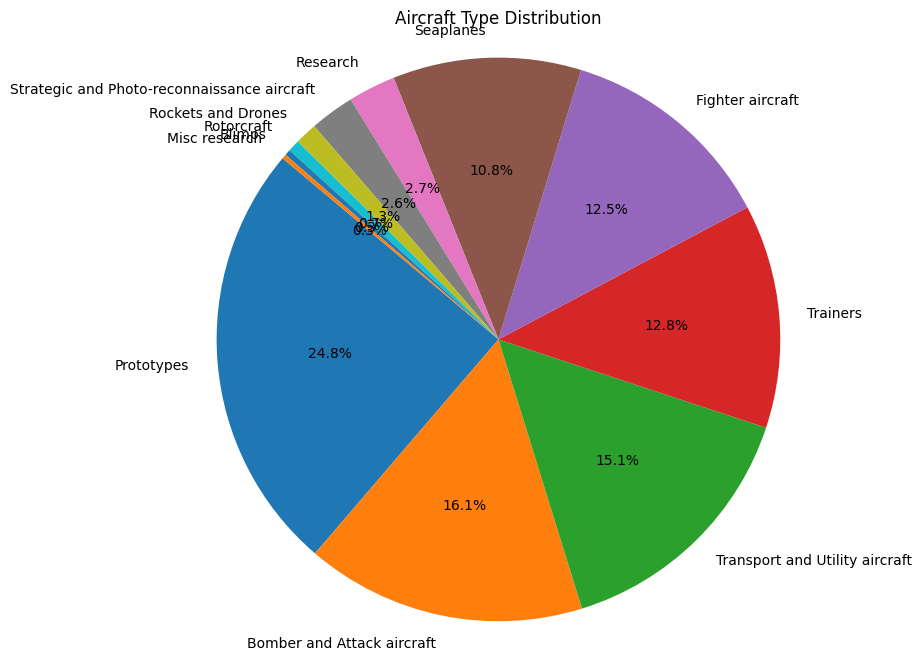

In [36]:
plt.figure(figsize=(8,8))
plt.pie(aircraft_counts,labels=aircraft_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Aircraft Type Distribution')
plt.axis('equal')
plt.show()

In [37]:
df.loc[df['Number of International Operators']>0,'Number of International Operators'].min()

1